<a href="https://colab.research.google.com/github/elif-tr/Neural-Networks/blob/master/Regression_MLP_Using_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Regression MLP Using Sequential API

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [3]:
housing = fetch_california_housing()



*   We will first split our data for training and testing.



In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)



*   We will now split our training data for training and validation


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

We will now scale our input features with standar scaler.

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
                                 keras.layers.Dense(1)
])



*   Output layer will have a single neuron beacuse we want to predict a single value and uses no activation function. However, if we wish to limit the values to positives only, we could have used Relu as out output layers activation function as well. 
*   The data is a little noisy therefore, we decided to have only one hidden layer to avoid  overfitting.



In [11]:
model.compile(loss= "mean_squared_error", optimizer="sgd")

In [15]:
history = model.fit(X_train, y_train, epochs = 20,  validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3664 - val_loss: 0.3946
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3623 - val_loss: 0.4118
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3655 - val_loss: 0.3905
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3551 - val_loss: 0.3891
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3536 - val_loss: 0.3855
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3497 - val_loss: 0.3837
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3822 - val_loss: 0.3951
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3539 - val_loss: 0.3870
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3603 - val_loss: 0.4289
Epoch 10/20
363/363 [==============================] - 0s 994us/step - loss: 0.3598 - val_loss: 0.40

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

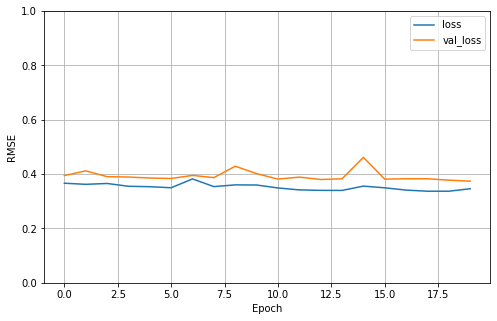

In [17]:
pd.DataFrame(history.history).plot(figsize = (8,5)) #history.history contains the loss and extra metrics of the model
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

In [18]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 726us/step - loss: 0.3818


Lets make some predictions

In [19]:
X_new = X_test[:3] #lets pretend these are new instances

In [20]:
y_pred =  model.predict(X_new)

In [21]:
y_pred

array([[2.5928843],
       [1.0165768],
       [2.5311239]], dtype=float32)

In [22]:
y_test[:3]

array([2.046, 0.915, 2.365])

Our model has a 0.3818 error rate for out of sample data points. When we make predictions on the new data as seen above, we can see that our model is preducing values fairly close to its original ones. 